# Вариант 3
## Коношенков

In [1]:
import numpy as np
#Функция для создания синусоиды
def rounding(n):
    return round(round(n,3)+0.001,3) if (round(n,3)*1000)%2!=0 else round(n,3)

def sinys(t,amplisuda,L):
    return amplisuda*np.sin(np.pi*t/L)

def solve(k,c,m1,m2,m3,m4,m5,h1,l1,l2,l3,L,v,A,I1,delta_t=0.002,gamma = 0.5,betta = 0.25):
    T = round((l1+l3+L)/v,2)
    T = [round(i,3) for i in np.arange(0,(T+0.001),delta_t)]
    N = len(T)
    t_matrix = list(map(rounding,[(l3-l3)/v,(l3-l2)/v,(l3+l1)/v]))
    n_it1t = int((L/v)/delta_t)
    sinus = np.array([sinys(r,A,L) for r in np.linspace(0,1,n_it1t)])
    K_diag = np.diag(k)
    D = np.array([[-1,h1,1,0,0,0],
    [1,-l1,0,-1,0,0],
    [1,l2,0,0,-1,0],
    [1,l3,0,0,0,-1],
    [0,0,0,1,0,0],
    [0,0,0,0,1,0],
    [0,0,0,0,0,1]])
    K = np.transpose(D)@K_diag@D
    #Создаем матрицу коэффициентов демпфирования
    C_diag = np.diag(c)
    C = np.array([[0,0,0,0,0,0],
    [1,-l1,0,-1,0,0],
    [1,l2,0,0,-1,0],
    [1,l3,0,0,0,-1],
    [0,0,0,1,0,0],
    [0,0,0,0,1,0],
    [0,0,0,0,0,1]])
    C = np.transpose(C)@C_diag@C
    #Создаем диагональную матрицу масс и моментов
    M = np.diag([m1,I1,m2,m3,m4,m5])
    #Делаем матрицу внешних воздействий
    n = D.shape[0]-len(t_matrix)+1
    y_voz = np.zeros((D.shape[0]+1,N))
    y_voz[0,:] = T
    index_t = [np.where(y_voz[0,:] == i)[-1][-1] for i in t_matrix]
    for i in index_t:
        y_voz[n,i:] =  np.concatenate([sinus,np.zeros((N-n_it1t-i))])
        n+=1
    y_impact = y_voz[1:,:]
    #Создаем обратную матрицу
    M_reverse = np.linalg.inv(M+delta_t*gamma*C+delta_t**2*betta*K)
    #Создадим оператор для ввода вектора внешних сил
    K_diag_transpose = np.transpose(D)@K_diag
    #Зададим вектора перемещения скорости и ускорения в 0 момент
    X = np.zeros((K_diag_transpose.shape[0],1))
    X_t = np.zeros((K_diag_transpose.shape[0],1))
    X_tt = np.zeros((K_diag_transpose.shape[0],1))
    for i in range(N-1):
        #Формируем матрицы методом Ньюмарка
        #Ускорений
        F = K_diag_transpose@y_impact[:,i+1]-C@(X_t[:,-1]+delta_t*(1-gamma)*X_tt[:,-1])-K@(X[:,-1]+delta_t*X_t[:,-1]+1/2*delta_t**2*(1-2*betta)*X_tt[:,-1])
        X_tt = np.concatenate([X_tt,(np.dot(F,M_reverse)).reshape(-1,1)],axis =1)
        #Скоростей
        X_tn = X_t[:,i]+delta_t*(gamma*X_tt[:,-1]+(1-gamma)*X_tt[:,i])
        X_t = np.concatenate([X_t,X_tn.reshape(-1,1)],axis =1)
        #Перемещений
        X_n = X[:,i]+delta_t*X_t[:,i]+0.5*(delta_t**2)*(2*betta*X_tt[:,-1]+(1-2*betta)*X_tt[:,i])
        X = np.concatenate([X,X_n.reshape(-1,1)],axis =1)
    return X,X_t,X_tt

In [2]:
X,X_t,X_tt = solve([10**6,8*10**4,9*10**4,85*10**3,10**6,10**6,10**6],[0,2*10**3,2*10**3,2*10**3,2*10**3,2*10**3,2*10**3],180,30,20,22,31,0.83,1.250,0.64,0.95,0.4,5.56,0.15,640)

,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,235
0,0.0,1.524727e-05,0.000114,0.000428,0.001116,0.002308,0.004064,0.006361,0.009093,0.012086,...,-0.009227,-0.012313,-0.014539,-0.015763,-0.015903,-0.014945,-0.012956,-0.010121,-0.006811,-0.003506
1,0.0,-5.507359e-06,-0.000041,-0.000157,-0.000415,-0.000869,-0.001553,-0.002474,-0.003605,-0.004896,...,-0.000981,-0.001643,-0.001995,-0.002034,-0.001777,-0.001248,-0.000487,0.000451,0.001470,0.002455
2,0.0,6.393025e-07,0.000007,0.000041,0.000158,0.000464,0.001125,0.002356,0.004388,0.007426,...,-0.022450,-0.022037,-0.020173,-0.017346,-0.014069,-0.010810,-0.007924,-0.005613,-0.003919,-0.002754
3,0.0,1.371157e-03,0.007487,0.020936,0.041696,0.067734,0.095788,0.122160,0.143387,0.156723,...,-0.002785,-0.003002,-0.003084,-0.002997,-0.002718,-0.002246,-0.001599,-0.000823,0.000007,0.000788
4,0.0,9.043984e-07,0.000008,0.000037,0.000113,0.000266,0.000520,0.000880,0.001332,0.001834,...,-0.005611,-0.005661,-0.005400,-0.004826,-0.003957,-0.002833,-0.001512,-0.000074,0.001368,0.002669
5,0.0,5.786853e-07,0.000005,0.000024,0.000075,0.000180,0.000358,0.000619,0.000957,0.001348,...,-0.084734,-0.043092,0.000653,0.044144,0.085079,0.121316,0.150982,0.168505,0.166387,0.145149


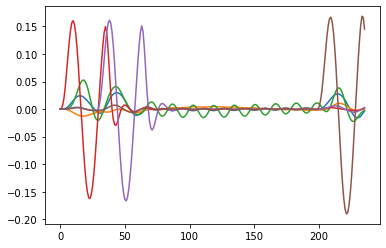

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

for i in range(len(X)):
    plt.plot(X[i])
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,235
0,0.0,0.015247,0.083078,0.231285,0.457166,0.734221,1.021853,1.275647,1.456331,1.536197,...,-1.737055,-1.349032,-0.877018,-0.347028,0.207798,0.749690,1.239520,1.595308,1.714811,1.589706
1,0.0,-0.005507,-0.030318,-0.085569,-0.172055,-0.282075,-0.402423,-0.517709,-0.613380,-0.678005,...,-0.406908,-0.254701,-0.097066,0.057210,0.200714,0.327629,0.433727,0.503771,0.515585,0.469472
2,0.0,0.000639,0.005966,0.027898,0.088579,0.217528,0.443973,0.786855,1.245368,1.792709,...,-0.212146,0.625319,1.237872,1.589891,1.686947,1.571677,1.314134,0.997153,0.697339,0.467255
3,0.0,1.371157,4.744837,8.703752,12.056224,13.981587,14.072618,12.299838,8.927322,4.408059,...,-0.136827,-0.079935,-0.002627,0.089843,0.188949,0.283873,0.362926,0.412739,0.417109,0.364319
4,0.0,0.000904,0.006387,0.022437,0.053595,0.099504,0.154016,0.206536,0.244763,0.257836,...,-0.101949,0.051645,0.209901,0.364058,0.504192,0.619932,0.701429,0.736359,0.705994,0.595173
5,0.0,0.000579,0.004143,0.014809,0.036127,0.068737,0.109414,0.151472,0.186218,0.204928,...,20.001885,21.640576,22.103669,21.387575,19.547000,16.690672,12.975243,4.547838,-6.665543,-14.573306


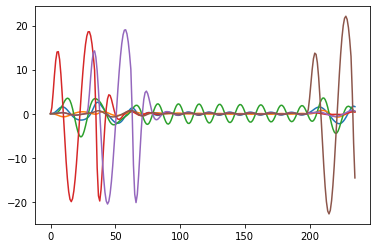

In [4]:
for i in range(len(X)):
    plt.plot(X_t[i])
pd.DataFrame(X_t)

,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,235
0,0.0,15.247270,52.583502,95.623953,130.256816,146.797763,140.834026,112.960076,67.724091,12.142043,...,170.269777,217.752607,254.261709,275.728351,279.097432,262.794398,227.035866,128.752422,-9.249472,-115.856112
1,0.0,-5.507359,-19.302845,-35.948216,-50.537897,-59.482830,-60.865063,-54.420491,-41.250131,-23.375387,...,73.574213,78.633518,79.000951,75.274974,68.229012,58.686254,47.412274,22.631077,-10.816913,-35.296411
2,0.0,0.639303,4.687779,17.243933,43.437323,85.510930,140.934492,201.947205,256.565824,290.775824,...,467.901541,369.564061,242.988241,109.030671,-11.974130,-103.296152,-154.247037,-162.733117,-137.081069,-93.003539
3,0.0,1371.156936,2002.522685,1956.393112,1396.078895,529.283638,-438.252076,-1334.528720,-2037.986669,-2481.277046,...,22.912800,33.979465,43.328073,49.142033,49.964099,44.959926,34.092979,15.719779,-11.348955,-41.441584
4,0.0,0.904398,4.577779,11.472821,19.685243,26.223308,28.289244,24.230842,13.995251,-0.921640,...,74.627361,78.966812,79.288891,74.868363,65.265373,50.473979,31.023029,3.907408,-34.272228,-76.548583
5,0.0,0.578685,2.985391,7.681241,13.636586,18.973610,21.702549,20.355452,14.390885,4.319697,...,1109.048957,529.642077,-66.548851,-649.545036,-1191.029440,-1665.299481,-2050.128625,-6377.276965,-4836.104054,-3071.658783


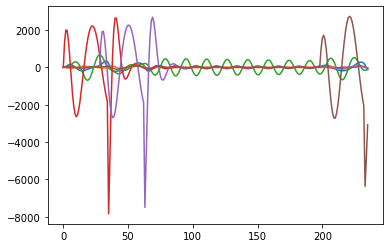

In [5]:
for i in range(len(X)):
    plt.plot(X_tt[i])
pd.DataFrame(X_tt)